<a href="https://colab.research.google.com/github/MohamedAbuAmira/ML-DL-Examples/blob/master/Mask_Detection_with_CV2_and_Keras_(Training_and_Prediction).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

* By Mohammed Tayseer Abu Amira
* [Github](https://github.com/MohamedAbuAmira)
* [Linkedin](https://www.linkedin.com/in/mohamedabuamira/)

In [1]:
# Mount To Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


URL to folder in my google drive :https://drive.google.com/drive/folders/1mUzFCRUqUX-_l-fM71_U9Z1fWhcm1Pr-?usp=sharing

In [3]:
# The folder in google drive from 
# https://www.pyimagesearch.com/2020/05/04/covid-19-face-mask-detector-with-opencv-keras-tensorflow-and-deep-learning/


In [4]:
%cd /content/drive/My\ Drive/face-mask-detector

/content/drive/My Drive/face-mask-detector


In [5]:
%pwd


'/content/drive/My Drive/face-mask-detector'

In [8]:
!python train_mask_detector.py --dataset dataset

2020-09-11 16:32:58.914688: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
[INFO] Loading images from the dataset...
2020-09-11 16:33:08.111818: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcuda.so.1
2020-09-11 16:33:08.171063: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:982] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-09-11 16:33:08.171749: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1716] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla T4 computeCapability: 7.5
coreClock: 1.59GHz coreCount: 40 deviceMemorySize: 14.73GiB deviceMemoryBandwidth: 298.08GiB/s
2020-09-11 16:33:08.171813: I tensorflow/stream_executor/platform/default/dso_loader.cc:48] Successfully opened dynamic library libcudart.so.10.1
2020-09-11 16:33:08.368504: I t

# Implementing COVID-19 face mask detector for images with OpenCV

In [18]:
# Give input image file path (check other paths also)

# import the necessary packages
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import cv2
import os
from google.colab.patches import cv2_imshow
from natsort import natsorted, ns

input_file_paths =[os.path.join('/content/drive/My Drive/face-mask-detector/examples', img) for img in os.listdir('/content/drive/My Drive/face-mask-detector/examples')]

# load our serialized face detector model from disk
print("[INFO] loading face detector model...")
prototxtPath = "/content/drive/My Drive/face-mask-detector/face_detector/deploy.prototxt"
weightsPath = "/content/drive/My Drive/face-mask-detector/face_detector/res10_300x300_ssd_iter_140000.caffemodel"
net = cv2.dnn.readNet(prototxtPath, weightsPath)

# load the face mask detector model from disk
print("[INFO] loading face mask detector model...")
model = load_model("mask_detector.model")

[INFO] loading face detector model...
[INFO] loading face mask detector model...


In [19]:
def process_images(input_file_path):
	# load the input image from disk, clone it, and grab the image spatial
  # dimensions
	image = cv2.imread(input_file_path)
	# orig = image.copy()
	(h, w) = image.shape[:2]

	# construct a blob from the image
	blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
		(104.0, 177.0, 123.0))

	# pass the blob through the network and obtain the face detections
	print("[INFO] computing face detections...")
	net.setInput(blob)
	detections = net.forward()

	# loop over the detections
	for i in range(0, detections.shape[2]):
		# extract the confidence (i.e., probability) associated with
		# the detection
		confidence = detections[0, 0, i, 2]

		# filter out weak detections by ensuring the confidence is
		# greater than the minimum confidence
		if confidence > 0.5:
			# compute the (x, y)-coordinates of the bounding box for
			# the object
			box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
			(startX, startY, endX, endY) = box.astype("int")

			# ensure the bounding boxes fall within the dimensions of
			# the frame
			(startX, startY) = (max(0, startX), max(0, startY))
			(endX, endY) = (min(w - 1, endX), min(h - 1, endY))

			# extract the face ROI, convert it from BGR to RGB channel
			# ordering, resize it to 224x224, and preprocess it
			face = image[startY:endY, startX:endX]
			face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
			face = cv2.resize(face, (224, 224))
			face = img_to_array(face)
			face = preprocess_input(face)
			face = np.expand_dims(face, axis=0)

			# pass the face through the model to determine if the face
			# has a mask or not
			(mask, withoutMask) = model.predict(face)[0]

			# determine the class label and color we'll use to draw
			# the bounding box and text
			label = "Mask" if mask > withoutMask else "No Mask"
			color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

			# include the probability in the label
			label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

			# display the label and bounding box rectangle on the output
			# frame
			cv2.putText(image, label, (startX, startY - 10),
				cv2.FONT_HERSHEY_SIMPLEX, 0.45, color, 2)
			cv2.rectangle(image, (startX, startY), (endX, endY), color, 2)

	# show the output image
	save_path = input_file_path.split(".",1)
	# print (save_path[0])
	# print (save_path[-1])
	cv2_imshow(image)
	# cv2.imwrite(save_path[0] + "_pred." + save_path[-1],image)

[INFO] computing face detections...


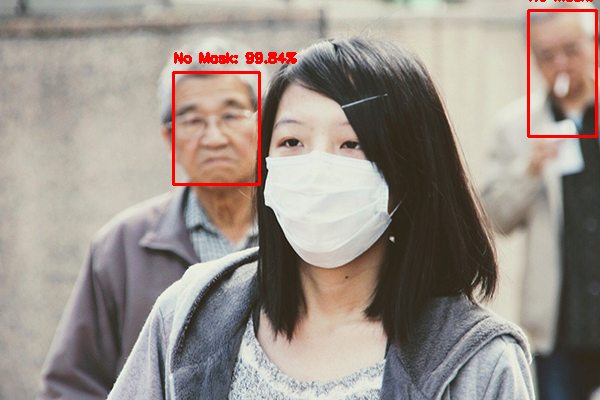

[INFO] computing face detections...


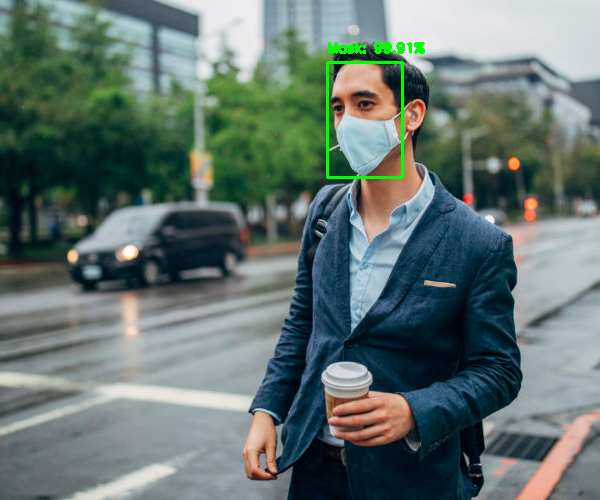

[INFO] computing face detections...


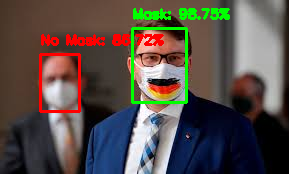

[INFO] computing face detections...


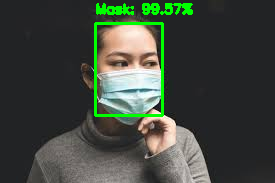

[INFO] computing face detections...


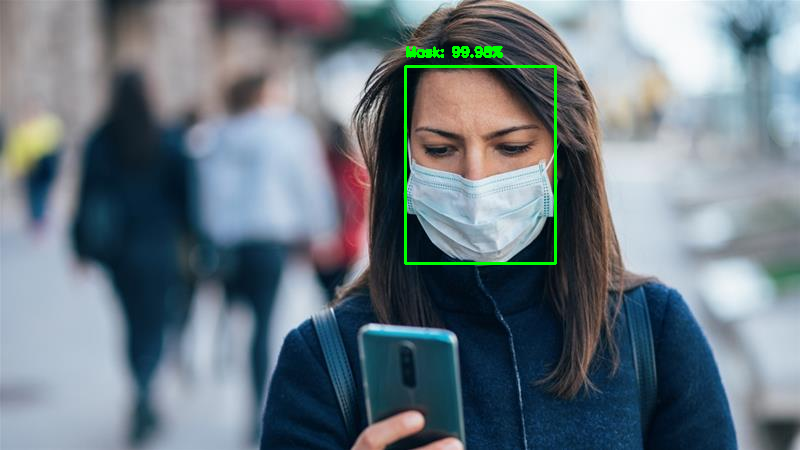

[INFO] computing face detections...


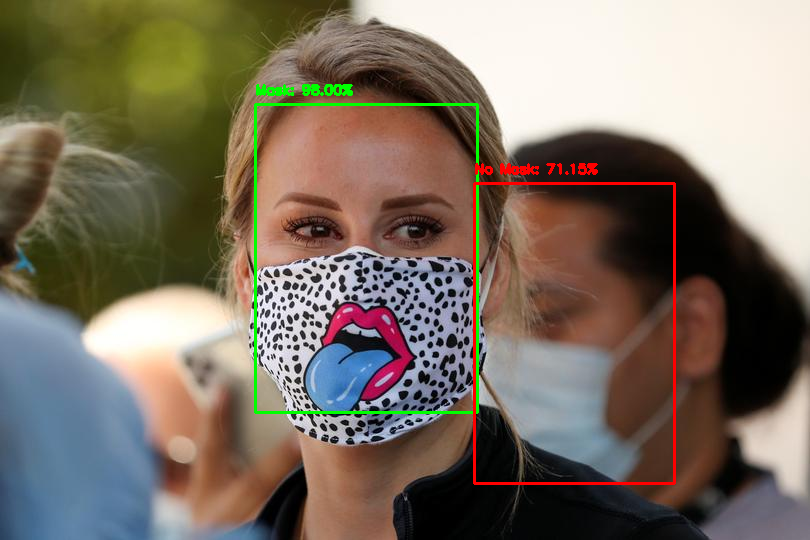

[INFO] computing face detections...


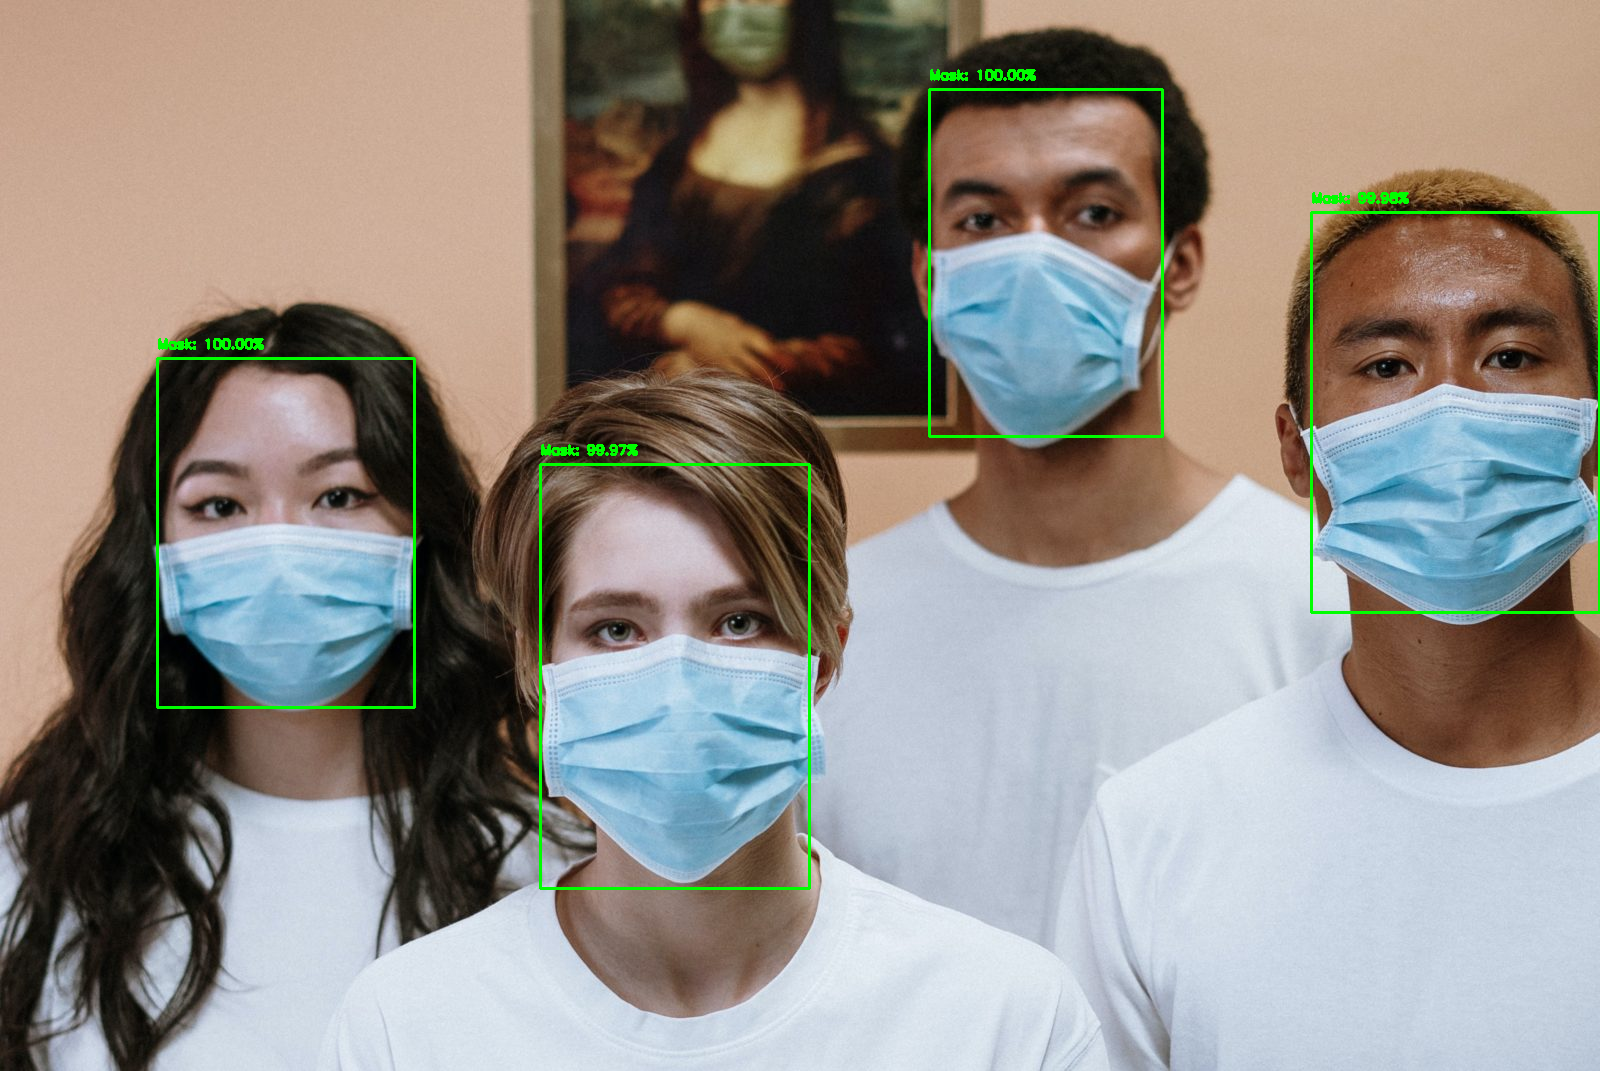

AttributeError: ignored

In [20]:
for img in input_file_paths:
  #start the process
  process_images(img)

# Predict on Multiple Images and make a MP4 video

In [13]:
# USAGE
# Give input images directory and output store directory

# import the necessary packages
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import numpy as np
import argparse
import cv2
import os
from google.colab.patches import cv2_imshow
from natsort import natsorted, ns

# input_file_path = "/content/drive/My Drive/my_projects/face_mask_detector/testSet/pic7.jpg"
input_folder_path = "/content/drive/My Drive/face-mask-detector/examples/"
output_folder_path = "/content/drive/My Drive/face-mask-detector/test_OUTPUT.mp4"

# load our serialized face detector model from disk
print("[INFO] loading face detector model...")
prototxtPath = "/content/drive/My Drive/face-mask-detector/face_detector/deploy.prototxt"
weightsPath = "/content/drive/My Drive/face-mask-detector/face_detector/res10_300x300_ssd_iter_140000.caffemodel"
net = cv2.dnn.readNet(prototxtPath, weightsPath)

# load the face mask detector model from disk
print("[INFO] loading face mask detector model...")
model = load_model("mask_detector.model")

img_array = []


[INFO] loading face detector model...
[INFO] loading face mask detector model...


In [10]:
def process_images(input_file_path,count):
	# load the input image from disk, clone it, and grab the image spatial
  # dimensions
	image = cv2.imread(input_file_path)
	orig = image.copy()
	(h, w) = image.shape[:2]

	# construct a blob from the image
	blob = cv2.dnn.blobFromImage(image, 1.0, (300, 300),
		(104.0, 177.0, 123.0))

	# pass the blob through the network and obtain the face detections
	# print("[INFO] computing face detections...")
	net.setInput(blob)
	detections = net.forward()
	

	# loop over the detections
	for i in range(0, detections.shape[2]):
		# extract the confidence (i.e., probability) associated with
		# the detection
		confidence = detections[0, 0, i, 2]

		# filter out weak detections by ensuring the confidence is
		# greater than the minimum confidence
		if confidence > 0.5:
			# compute the (x, y)-coordinates of the bounding box for
			# the object
			box = detections[0, 0, i, 3:7] * np.array([w, h, w, h])
			(startX, startY, endX, endY) = box.astype("int")

			# ensure the bounding boxes fall within the dimensions of
			# the frame
			(startX, startY) = (max(0, startX), max(0, startY))
			(endX, endY) = (min(w - 1, endX), min(h - 1, endY))

			# extract the face ROI, convert it from BGR to RGB channel
			# ordering, resize it to 224x224, and preprocess it
			face = image[startY:endY, startX:endX]
			face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)
			face = cv2.resize(face, (224, 224))
			face = img_to_array(face)
			face = preprocess_input(face)
			face = np.expand_dims(face, axis=0)

			# pass the face through the model to determine if the face
			# has a mask or not
			(mask, withoutMask) = model.predict(face)[0]

			# determine the class label and color we'll use to draw
			# the bounding box and text
			label = "Mask" if mask > withoutMask else "No Mask"
			color = (0, 255, 0) if label == "Mask" else (0, 0, 255)

			# include the probability in the label
			label = "{}: {:.2f}%".format(label, max(mask, withoutMask) * 100)

			# display the label and bounding box rectangle on the output
			# frame
			cv2.putText(image, label, (startX, startY - 10),
				cv2.FONT_HERSHEY_SIMPLEX, 1, color, 2)
			cv2.rectangle(image, (startX, startY), (endX, endY), color, 5)

	# show the output image
	
	# cv2_imshow(image)
	height, width, layers = image.shape
	size = (width,height)
	img_array.append(image)
	# resized_frame = cv2.resize(image, (400, 225))
	count+=1
	# video.write(resized_frame)
	print ("\r[INFO] Count: {}".format(count),end='')
	return size, count
	# cv2.imwrite(save_path,image)


In [16]:
x=[]
sorted_path=[]

In [17]:
#start the process
x = os.listdir(input_folder_path)
sorted_path = natsorted(x, key=lambda y: y.lower())
count = 0
print ("[INFO] Total files: {}".format(len(x)))
for k in sorted_path: 
 file_path = input_folder_path + k
 print ("\r[INFO] File name: {}".format(file_path))
 size, count = process_images(file_path,count)

print ("\n[INFO] Total count/frames: {}".format(count))

#Saving all output frames as MP4 video
print ("[INFO] Saving video")
video = cv2.VideoWriter(output_folder_path, cv2.VideoWriter_fourcc(*'DIVX'), 1, size)
 
for i in range(len(img_array)):
    video.write(img_array[i])
video.release()
print ("[INFO] process complete.")

[INFO] Total files: 7
[INFO] File name: /content/drive/My Drive/face-mask-detector/examples/example_01.png
[INFO] File name: /content/drive/My Drive/face-mask-detector/examples/example_03.png
[INFO] File name: /content/drive/My Drive/face-mask-detector/examples/image1.jpg
[INFO] File name: /content/drive/My Drive/face-mask-detector/examples/image2.jpg
[INFO] File name: /content/drive/My Drive/face-mask-detector/examples/image3.jpg
[INFO] File name: /content/drive/My Drive/face-mask-detector/examples/image4.jpg
[INFO] File name: /content/drive/My Drive/face-mask-detector/examples/image5.jpg
[INFO] Count: 7
[INFO] Total count/frames: 7
[INFO] Saving video
[INFO] process complete.
